In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('data/spotify_data.csv')
df['is_pop'] = df['popularity'] > 50

df.head(20)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_pop
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,...,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3,True
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,...,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4,False
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,...,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4,True
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,...,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4,True
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,...,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4,True
5,5,Chris Smither,What They Say,24NvptbNKGs6sPy1Vh1O0v,48,2012,acoustic,0.566,0.570,2,...,1,0.0329,0.6880,0.000002,0.0943,0.9600,83.403,166240,4,False
6,6,Matt Wertz,Walking in a Winter Wonderland,0BP7hSvLAG3URGrEvNNbGM,48,2012,acoustic,0.575,0.606,9,...,1,0.0300,0.0119,0.000000,0.0675,0.3640,121.083,152307,4,False
7,7,Green River Ordinance,Dancing Shoes,3Y6BuzQCg9p4yH347Nn8OW,45,2012,acoustic,0.586,0.423,7,...,1,0.0261,0.2520,0.000006,0.0976,0.3180,138.133,232373,4,False
8,8,Jason Mraz,Living in the Moment,3ce7k1L4EkZppZPz1EJWTS,44,2012,acoustic,0.650,0.628,7,...,1,0.0232,0.0483,0.000000,0.1190,0.7000,84.141,235080,4,False
9,9,Boyce Avenue,Heaven,2EKxmYmUdAVXlaHCnnW13o,58,2012,acoustic,0.619,0.280,8,...,0,0.0317,0.7300,0.000000,0.1030,0.2920,129.948,250063,4,True


<Axes: >

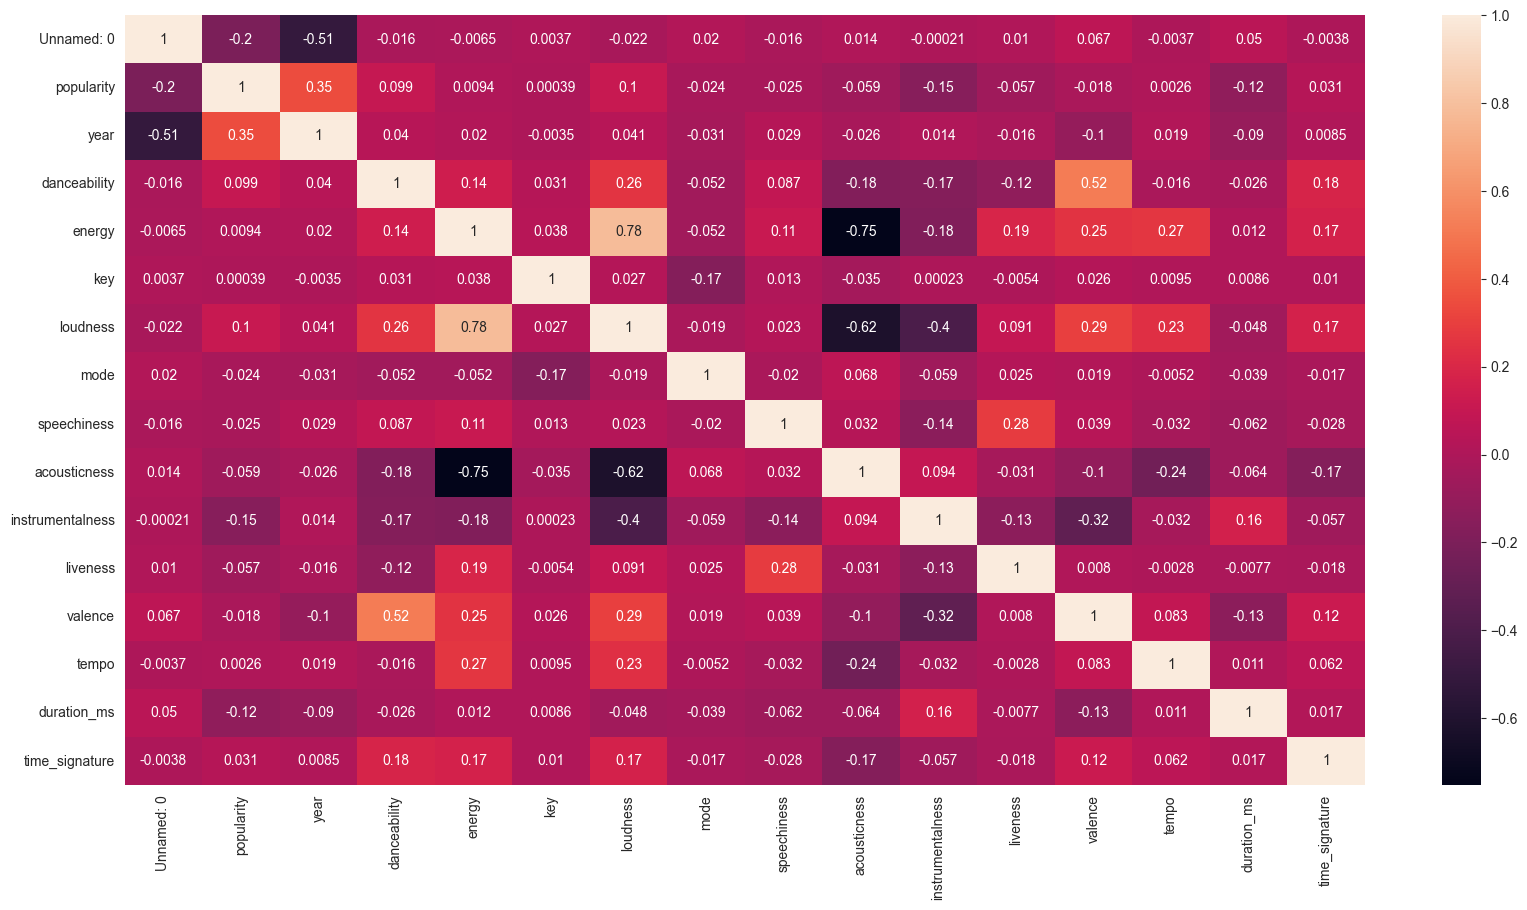

In [19]:
plt.figure(figsize=(20, 10))
df_num = df.select_dtypes(include=["number"])
sns.heatmap(df_num.corr(), annot=True)

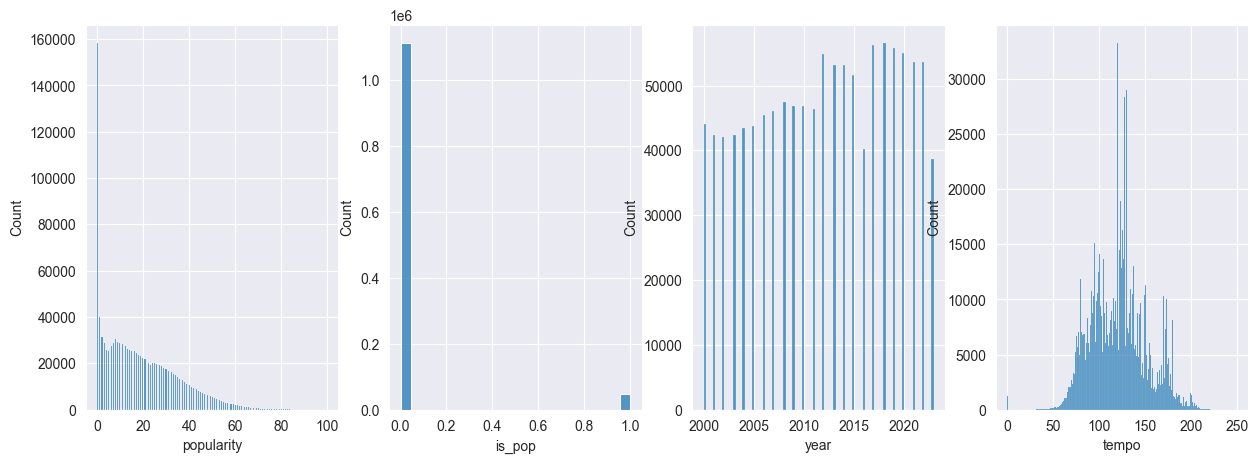

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

sns.histplot(data=df['popularity'], ax=ax[0])
sns.histplot(data=df['is_pop'], ax=ax[1])
sns.histplot(data=df['year'], ax=ax[2])
sns.histplot(data=df['tempo'], ax=ax[3])
plt.show()

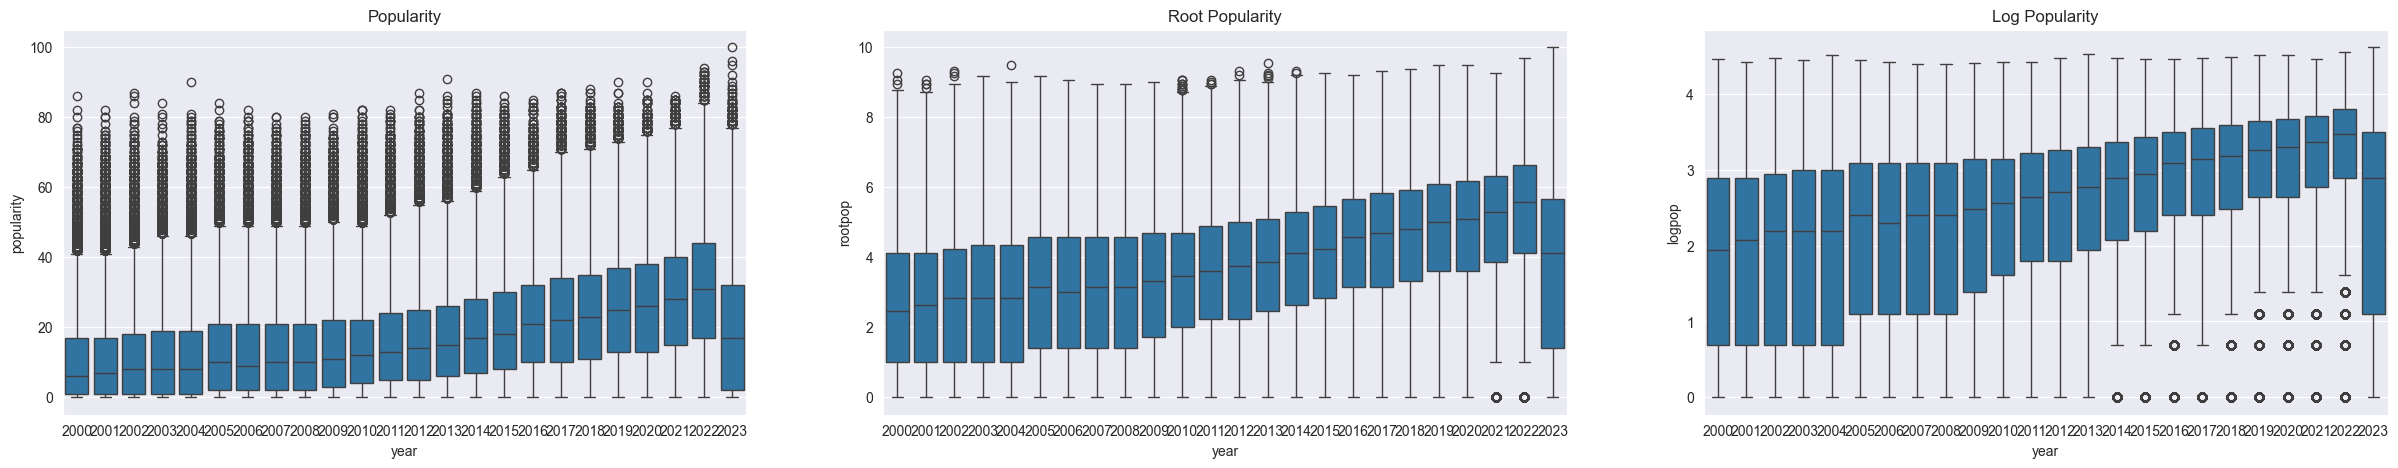

<Figure size 2000x1000 with 0 Axes>

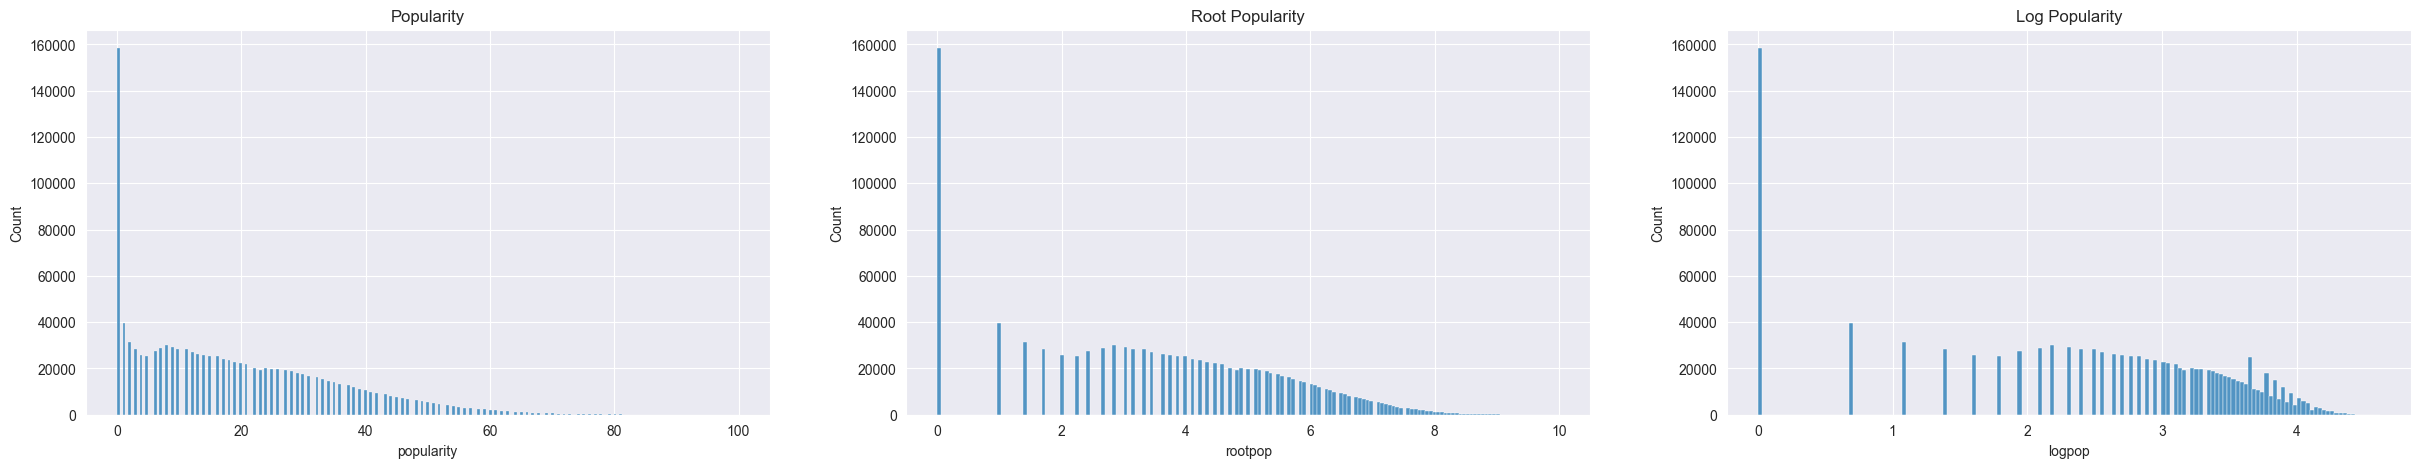

In [21]:
df['rootpop'] = np.sqrt(df['popularity'])
df['logpop'] = np.log1p(df['popularity'])
# df['revlogpop'] = np.expm1(df['popularity'])



fig, ax = plt.subplots(1, 3, figsize=(30, 5))

plt.figure(figsize=(20, 10))
sns.boxplot(x='year', y='popularity', data=df, ax=ax[0])
ax[0].set_title('Popularity')
sns.boxplot(x='year', y='rootpop', data=df, ax=ax[1])
ax[1].set_title('Root Popularity')
sns.boxplot(x='year', y='logpop', data=df, ax=ax[2])
ax[2].set_title('Log Popularity')
# sns.boxplot(x='year', y='revlogpop', data=df, ax=ax[3])
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(30, 5))
sns.histplot(data=df['popularity'], ax=ax[0])
ax[0].set_title('Popularity')
sns.histplot(data=df['rootpop'], ax=ax[1])
ax[1].set_title('Root Popularity')
sns.histplot(data=df['logpop'], ax=ax[2])
ax[2].set_title('Log Popularity')
plt.show()

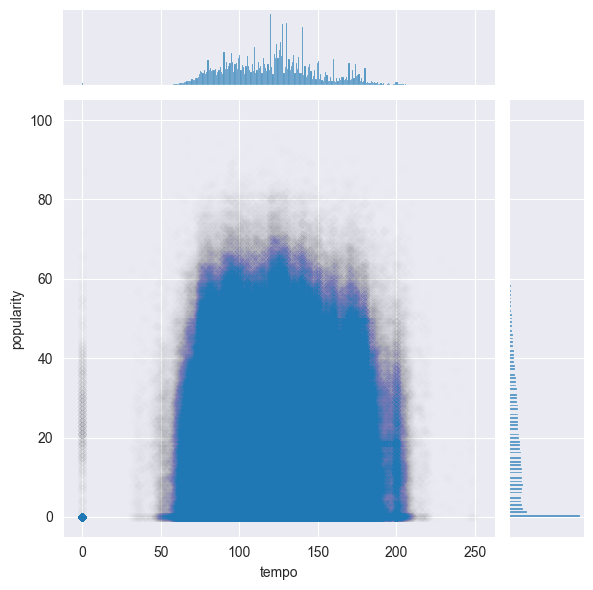

In [22]:
sns.jointplot(x='tempo', y='popularity', data=df, alpha=0.002)

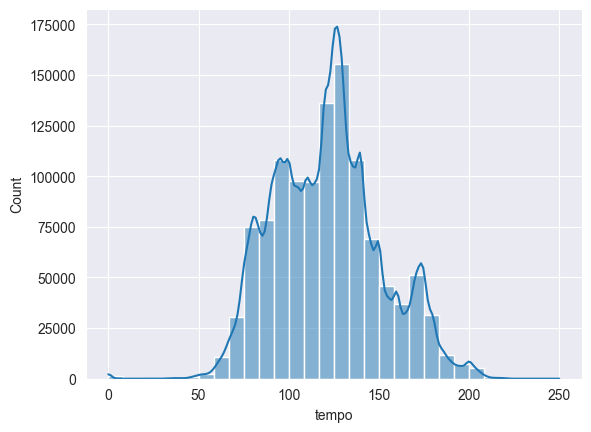

<Axes: xlabel='tempo', ylabel='Count'>

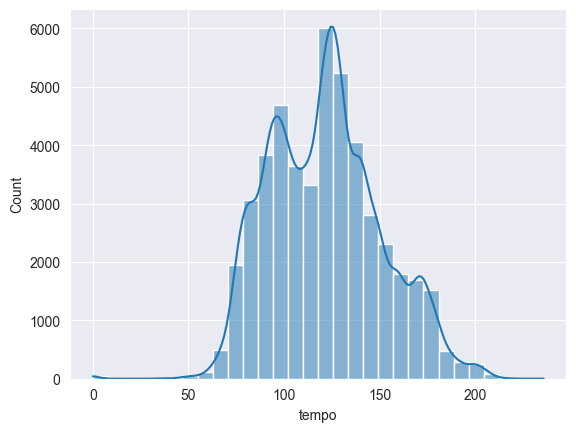

In [23]:
popular = df[df["is_pop"]]
sns.histplot(df["tempo"], bins=30,kde=True)
plt.show()
sns.histplot(popular["tempo"], bins=30,kde=True)


<Axes: xlabel='duration_ms', ylabel='popularity'>

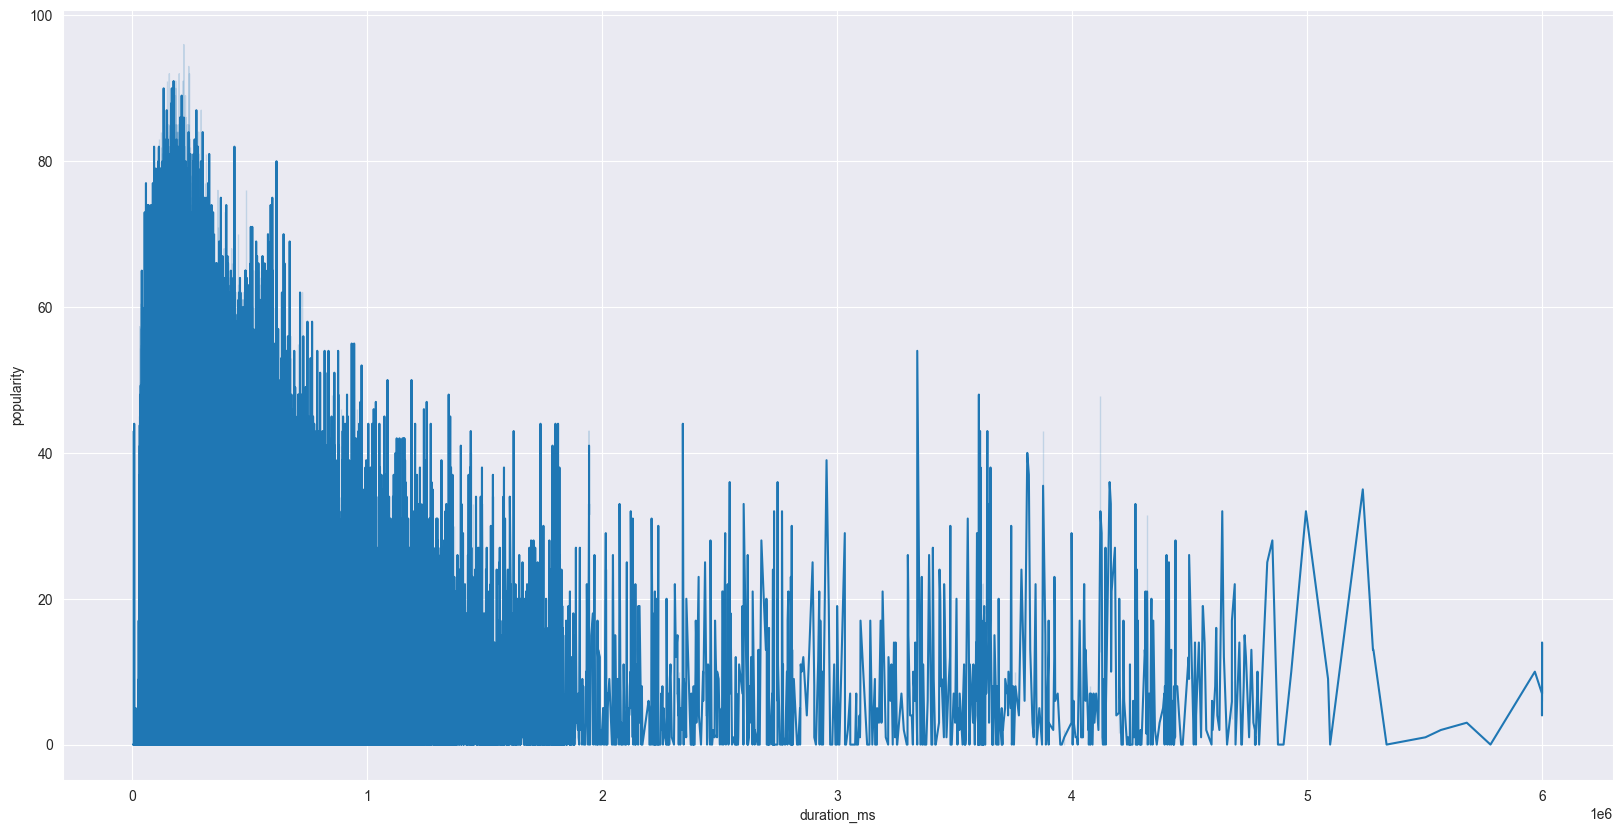

In [24]:
plt.figure(figsize=(20, 10))
# sns.lineplot(x='year', y=df['duration_ms'], data=df)
sns.lineplot(y='popularity', x='duration_ms', data=df)